<a href="https://colab.research.google.com/github/bilik49/algorithms_itmo/blob/main/algorithms_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [21]:
alpha = random.uniform (0, 1)
beta = random.uniform (0, 1)

xk = np.array([i/100 for i in range(0, 101)])
yk = [alpha * i + beta + random.normalvariate(0, 1) for i in xk]

# Definition of functions

In [22]:
eps = 0.001
N = int(1 / eps)

In [23]:
def f_linear(x, a, b):
    return a * x + b
def f_ration(x, a, b):
    return a / (1 + b * x)

In [24]:
def D_linear(par):
    a, b = par
    return np.sum((f_linear(xk, a, b) - yk) ** 2)
def D_ration(par):
    a, b = par
    return np.sum((f_ration(xk, a, b) - yk) ** 2)

# Gradient method

In [25]:
def mean_squared_error(y_true, y_predict):
    return np.sum((y_predict - y_true) ** 2) / len(y_true)

In [26]:
def gradient_descent(xk, yk, a0, b0, f, num_iter = 5000, lr = 0.01, verbose = 100):
    a, b = a0, b0
    # loss_prev = None
    f_calc = 0
    last_iter = 0
    for i in range(num_iter):
        loss = mean_squared_error(yk, f(xk, a, b))

        # if loss_prev and abs(loss_prev-loss) < 0.00001:
        #     last_iter = i
        #     print(f'Stopping at {last_iter} iteration.')
        #     break

        # loss_prev = loss

        if f.__name__ == 'f_linear':
            da = 2 * np.sum((f(xk, a, b)-yk) * xk) / len(xk)
            db = 2 * np.sum(f(xk, a, b)-yk) / len(xk)
        else:
            da = 2 * np.sum((f(xk, a, b)-yk) / (1 + b*xk)) / len(xk)
            db = 2 * np.sum((f(xk, a, b)-yk) * (-a*xk / (1 + b*xk))) / len(xk)

        f_calc += 2 * len(xk)

        a = a - lr * da
        b = b - lr * db

        if i % verbose == 0:
            print('iter: ', i, 'loss: ', round(loss,4), 'a: ', round(a, 4), 'b: ', round(b, 4))
    if last_iter == 0:
        last_iter = num_iter

    return a, b, f_calc, last_iter

iter:  0 loss:  2.3162 a:  0.012 b:  0.0209
iter:  100 loss:  1.1771 a:  0.4708 b:  0.7439
iter:  200 loss:  1.1674 a:  0.5501 b:  0.7757
iter:  300 loss:  1.1651 a:  0.5949 b:  0.7574
iter:  400 loss:  1.1633 a:  0.6321 b:  0.7379
iter:  500 loss:  1.1619 a:  0.6645 b:  0.7205
iter:  600 loss:  1.1609 a:  0.6928 b:  0.7054
iter:  700 loss:  1.1601 a:  0.7176 b:  0.6921
iter:  800 loss:  1.1595 a:  0.7392 b:  0.6805
iter:  900 loss:  1.159 a:  0.7582 b:  0.6703
iter:  1000 loss:  1.1587 a:  0.7748 b:  0.6614
iter:  1100 loss:  1.1584 a:  0.7892 b:  0.6537
iter:  1200 loss:  1.1582 a:  0.8019 b:  0.6469
iter:  1300 loss:  1.158 a:  0.813 b:  0.641
iter:  1400 loss:  1.1579 a:  0.8227 b:  0.6358
iter:  1500 loss:  1.1578 a:  0.8311 b:  0.6312
iter:  1600 loss:  1.1578 a:  0.8385 b:  0.6273
iter:  1700 loss:  1.1577 a:  0.845 b:  0.6238
iter:  1800 loss:  1.1577 a:  0.8507 b:  0.6208
iter:  1900 loss:  1.1576 a:  0.8556 b:  0.6181
iter:  2000 loss:  1.1576 a:  0.8599 b:  0.6158
iter:  210

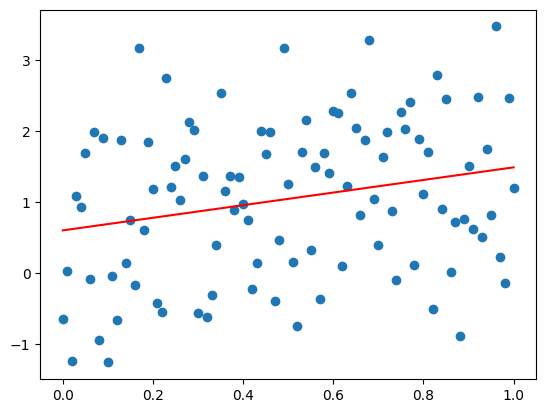

In [27]:
a, b, f_calc, num_iter = gradient_descent(xk, yk, 0, 0, f_linear, lr = 0.01, verbose = 100)
grad_linear_res = [a,b]
plt.scatter(xk,yk)
plt.plot(xk, f_linear(xk, a, b), 'r')

print('[a, b, f-calculations, N of iterations] =',[a, b, f_calc, num_iter])

iter:  0 loss:  2.3162 a:  0.0209 b:  0.0
iter:  100 loss:  1.1914 a:  0.8615 b:  -0.2638
iter:  200 loss:  1.1794 a:  0.8718 b:  -0.3463
iter:  300 loss:  1.1762 a:  0.8414 b:  -0.3908
iter:  400 loss:  1.1744 a:  0.8166 b:  -0.4241
iter:  500 loss:  1.1736 a:  0.7974 b:  -0.449
iter:  600 loss:  1.1734 a:  0.7827 b:  -0.4675
iter:  700 loss:  1.1734 a:  0.7717 b:  -0.4811
iter:  800 loss:  1.1735 a:  0.7634 b:  -0.4911
iter:  900 loss:  1.1737 a:  0.7573 b:  -0.4985
iter:  1000 loss:  1.1738 a:  0.7528 b:  -0.5039
iter:  1100 loss:  1.1739 a:  0.7495 b:  -0.5078
iter:  1200 loss:  1.174 a:  0.7471 b:  -0.5107
iter:  1300 loss:  1.1741 a:  0.7453 b:  -0.5128
iter:  1400 loss:  1.1742 a:  0.744 b:  -0.5143
iter:  1500 loss:  1.1742 a:  0.7431 b:  -0.5154
iter:  1600 loss:  1.1743 a:  0.7424 b:  -0.5162
iter:  1700 loss:  1.1743 a:  0.7419 b:  -0.5168
iter:  1800 loss:  1.1743 a:  0.7415 b:  -0.5172
iter:  1900 loss:  1.1743 a:  0.7413 b:  -0.5175
iter:  2000 loss:  1.1743 a:  0.7411 b:

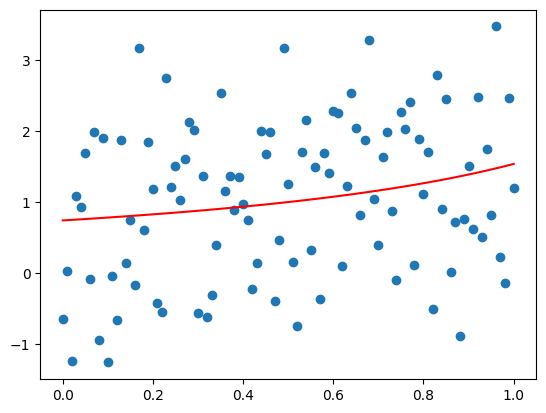

In [28]:
a, b, f_calc, num_iter = gradient_descent(xk, yk, 0, 0, f_ration, lr = 0.01)
grad_ration_res = [a,b]
plt.scatter(xk,yk)
plt.plot(xk, f_ration(xk, a, b), 'r')

print('[a, b, f-calculations, N of iterations] =',[a, b, f_calc, num_iter])

# Conjugate Gradient method

In [29]:
def SGD(f):
    from scipy.optimize import minimize
    res = minimize(f, [0., 0.], method = 'CG', options={'xtol':1e-3, 'disp':True})
    return res.x[0], res.x[1], res.nit, res.nfev

Optimization terminated successfully.
         Current function value: 116.909603
         Iterations: 5
         Function evaluations: 30
         Gradient evaluations: 10
[a, b, f-calculations, N of iterations] = [0.8901019662616542, 0.599627534924273, 30, 5]


<ipython-input-29-d70331f986bf>:3: OptimizeWarning: Unknown solver options: xtol
  res = minimize(f, [0., 0.], method = 'CG', options={'xtol':1e-3, 'disp':True})


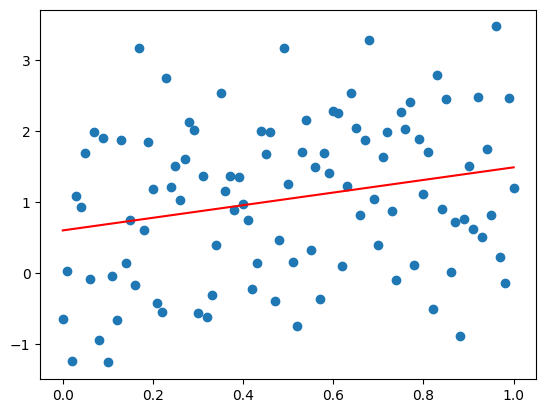

In [30]:
a, b, num_iter, f_calc = SGD(D_linear)
sgd_linear_res = [a, b]
plt.scatter(xk,yk)
plt.plot(xk, f_linear(xk, a, b), 'r')

print('[a, b, f-calculations, N of iterations] =',[a, b, f_calc, num_iter])

Optimization terminated successfully.
         Current function value: 118.507899
         Iterations: 12
         Function evaluations: 72
         Gradient evaluations: 24
[a, b, f-calculations, N of iterations] = [0.7751062830925031, -0.47319722858543883, 72, 12]


<ipython-input-29-d70331f986bf>:3: OptimizeWarning: Unknown solver options: xtol
  res = minimize(f, [0., 0.], method = 'CG', options={'xtol':1e-3, 'disp':True})


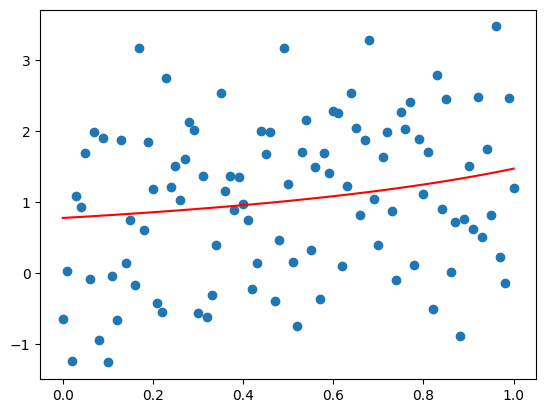

In [31]:
a, b, num_iter, f_calc = SGD(D_ration)
sgd_ration_res = [a, b]
plt.scatter(xk,yk)
plt.plot(xk, f_ration(xk, a, b), 'r')

print('[a, b, f-calculations, N of iterations] =',[a, b, f_calc, num_iter])

# Newton's Method

In [32]:
def d_linear(par):
    a, b = par
    return np.array([2 * np.sum((f_linear(xk, a, b)-yk) * xk), 2 * np.sum((f_linear(xk, a, b)-yk))])

def d_ration(par):
    a, b = par
    return np.array([2 * np.sum((f_ration(xk, a, b)-yk) / (1 + b*xk)), 2 * np.sum((f_ration(xk, a, b)-yk) * (-a*xk / (1 + b*xk)))])

def hess_linear(par):
    a, b = par
    hess = np.empty([2,2])
    hess[0,0] = np.sum(2 * xk ** 2)
    hess[0,1] = hess[1,0] = np.sum(2 * xk)
    hess[1,1] = 2
    return hess

def hess_ration(par):
    a, b = par
    hess = np.empty([2,2])
    hess[0,0] = np.sum(2 / (1+b*xk)**2)
    hess[0,1] = hess[1,0] = np.sum(2*xk*yk/(1+b*xk)**2 - 4*a*xk/(1+b*xk)**3)
    hess[1,1] = np.sum(6*a**2*xk**2/(1+b*xk)**4 - 4*a*xk**2*yk/(1+b*xk)**3)
    return hess

In [33]:
def newton(f, start, jac, hess):
    from scipy.optimize import minimize
    res = minimize(f, start, method = 'Newton-CG', jac=jac, hess=hess, options={'xtol':1e-3, 'disp':True})
    return res.x[0], res.x[1], res.nit, res.nfev

Optimization terminated successfully.
         Current function value: 116.910377
         Iterations: 25
         Function evaluations: 28
         Gradient evaluations: 28
         Hessian evaluations: 25
[a, b, f-calculations, N of iterations] = [0.8806801958019252, 0.6040053561754575, 28, 25]


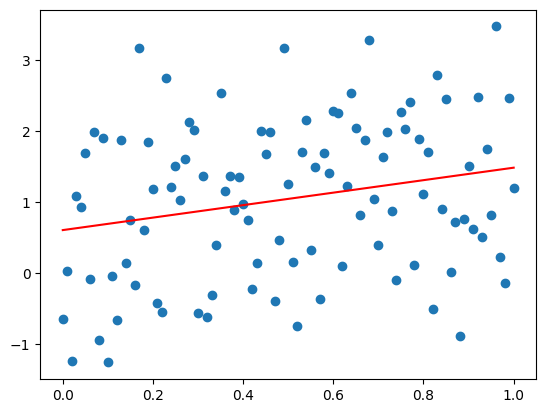

In [34]:
a, b, num_iter, f_calc = newton(D_linear, [0.,0.], d_linear, hess_linear)
newton_linear_res = [a, b]
plt.scatter(xk,yk)
plt.plot(xk, f_linear(xk, a, b), 'r')

print('[a, b, f-calculations, N of iterations] =',[a, b, f_calc, num_iter])

Optimization terminated successfully.
         Current function value: 118.616563
         Iterations: 11
         Function evaluations: 18
         Gradient evaluations: 18
         Hessian evaluations: 11
[a, b, f-calculations, N of iterations] = [0.7394744534791452, -0.5197370814346641, 18, 11]


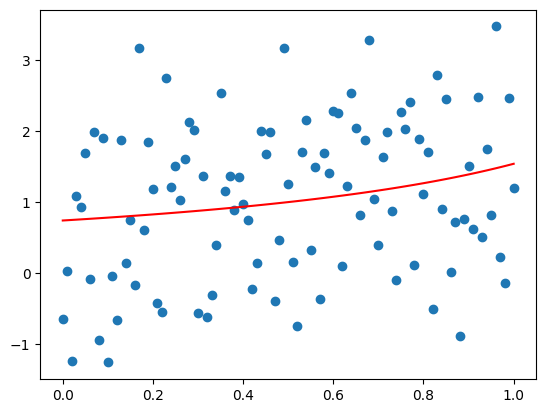

In [35]:
a, b, num_iter, f_calc = newton(D_ration, [0.,0.], d_ration, hess_ration)
newton_ration_res = [a, b]
plt.scatter(xk,yk)
plt.plot(xk, f_ration(xk, a, b), 'r')

print('[a, b, f-calculations, N of iterations] =',[a, b, f_calc, num_iter])

# Levenberg-Marquardt algorithm

In [36]:
def linear(par):
    a, b = par
    return (f_linear(xk, a, b) - yk) ** 2
def ration(par):
    a, b = par
    return (f_ration(xk, a, b) - yk) ** 2

In [37]:
def lm(f, start):
    from scipy.optimize import least_squares
    res = least_squares(f, start, method="lm", xtol=1e-3)
    return res.x[0], res.x[1], res.nfev

[a, b, f-calculations] = [0.8493292612095242, 0.6169601107314457, 34]


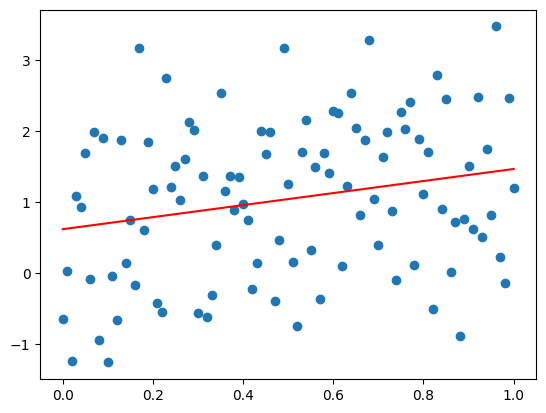

In [38]:
a, b, f_calc = lm(linear, [1., 1.])
lm_linear_res = [a, b]
plt.scatter(xk,yk)
plt.plot(xk, f_linear(xk, a, b), 'r')

print('[a, b, f-calculations] =',[a, b, f_calc])

[a, b, f-calculations] = [0.7482552385976959, -0.5005582460446839, 52]


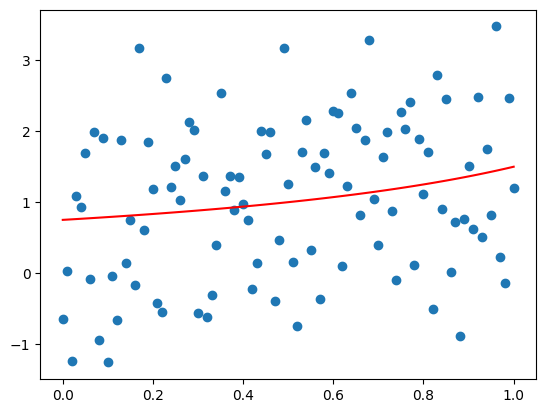

In [39]:
a, b, f_calc = lm(ration, [1., -0.5])
lm_ration_res = [a, b]
plt.scatter(xk,yk)
plt.plot(xk, f_ration(xk, a, b), 'r')

print('[a, b, f-calculations] =',[a, b, f_calc])

# Comparison of methods

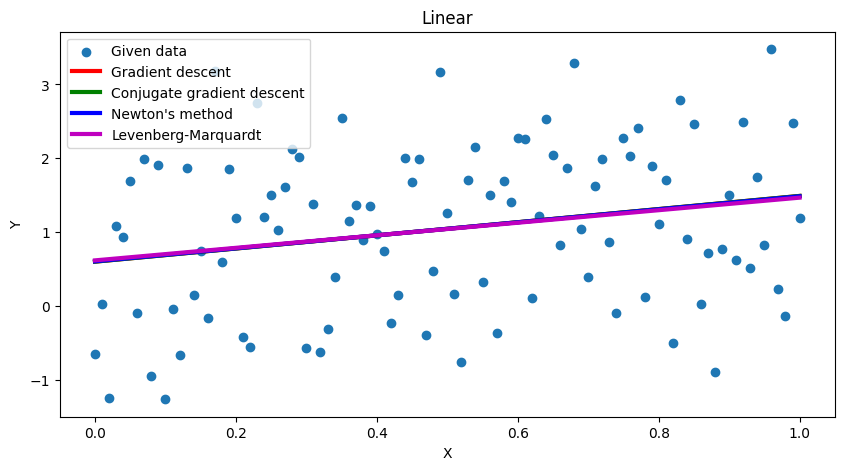

In [40]:
plt.figure(figsize=(10,5))
plt.title("Linear")
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(xk,yk, label = "Given data")
plt.plot(xk, f_linear(xk, grad_linear_res[0], grad_linear_res[1]), 'r', label="Gradient descent", linewidth = 3)
plt.plot(xk, f_linear(xk, sgd_linear_res[0], sgd_linear_res[1]), 'g', label="Conjugate gradient descent", linewidth = 3)
plt.plot(xk, f_linear(xk, newton_linear_res[0], newton_linear_res[1]), 'b', label="Newton's method", linewidth = 3)
plt.plot(xk, f_linear(xk, lm_linear_res[0], lm_linear_res[1]), 'm', label="Levenberg-Marquardt", linewidth = 3)
plt.legend()

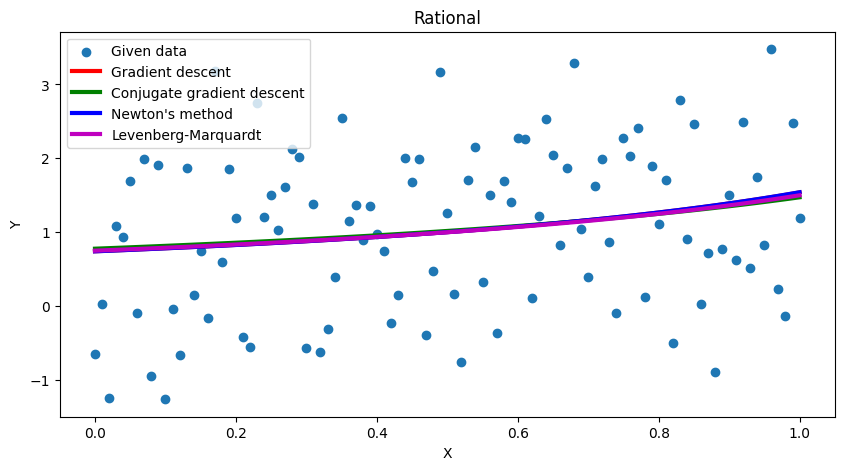

In [41]:
plt.figure(figsize=(10,5))
plt.title("Rational")
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(xk,yk, label = "Given data")
plt.plot(xk, f_ration(xk, grad_ration_res[0], grad_ration_res[1]), 'r', label="Gradient descent", linewidth = 3)
plt.plot(xk, f_ration(xk, sgd_ration_res[0], sgd_ration_res[1]), 'g', label="Conjugate gradient descent", linewidth = 3)
plt.plot(xk, f_ration(xk, newton_ration_res[0], newton_ration_res[1]), 'b', label="Newton's method", linewidth = 3)
plt.plot(xk, f_ration(xk, lm_ration_res[0], lm_ration_res[1]), 'm', label="Levenberg-Marquardt", linewidth = 3)
plt.legend()

# Task 2

In [42]:
eps = 0.001
N = int(1 / eps)

In [43]:
def f_linear(x, a, b):
    return a * x + b
def f_ration(x, a, b):
    return a / (1 + b * x)

In [44]:
def exhaustive_linear(N):
    res = []
    for a in range(N + 1):
        a = a / N
        for b in range(N + 1):
            b = b / N
            s = 0
            for k in range(len(xk)):
                s += (f_linear(xk[k], a, b) - yk[k]) ** 2
            res.append([s, a, b])

    return min(res, key=lambda x: x[0])[1:3]

In [45]:
a, b = exh_linear_res = exhaustive_linear(N)
print('[a, b, f-calculations, N of iterations] =',[a, b, (N+1) ** 2, (N+1) ** 2])

[a, b, f-calculations, N of iterations] = [0.891, 0.599, 1002001, 1002001]


In [46]:
def exhaustive_ration(N):
    res = []
    for a in range(N + 1):
        a = a / N
        for b in range(N + 1):
            b = -b / N
            s = 0
            for k in range(len(xk)):
                s += (f_ration(xk[k], a, b) - yk[k]) ** 2
            res.append([s, a, b])

    return min(res, key=lambda x: x[0])[1:3]

In [47]:
a, b = exh_ration_res= exhaustive_ration(N)
print('[a, b, f-calculations, N of iterations] =',[a, b, (N+1) ** 2, (N+1) ** 2])

<ipython-input-43-f96495cf1790>:4: RuntimeWarning: invalid value encountered in double_scalars
  return a / (1 + b * x)
<ipython-input-43-f96495cf1790>:4: RuntimeWarning: divide by zero encountered in double_scalars
  return a / (1 + b * x)


[a, b, f-calculations, N of iterations] = [0.775, -0.473, 1002001, 1002001]


In [48]:
def exhaustive(N, F, a = None, b = None):
    res = []
    for i in range(N + 1):
        x = i / N
        s = 0
        for k in range(len(xk)):
            f_val = F(xk[k], x, b) if a == None else F(xk[k], a, x)
            s += (f_val - yk[k]) ** 2
        res.append(s)
    return np.argmin(res) / N

In [49]:
def coordinate_descent_linear(N):
    a_curr = 0.05
    b_curr = 0.05
    a_prev = b_prev = 0
    num_iter = 0
    f_calc = 0
    while abs(a_curr - a_prev) >= eps and abs(b_curr - b_prev) >= eps:
        num_iter += 2
        a_prev = a_curr
        a_curr = exhaustive(N, f_linear, b = b_curr)
        f_calc += N + 1
        b_prev = b_curr
        b_curr = exhaustive(N, f_linear, a = a_curr)
        f_calc += N + 1
    return a_curr, b_curr, f_calc, num_iter

In [50]:
a, b, f_calc, num_iter = coordinate_descent_linear(N)
cd_linear_res = [a, b]
print('[a,b, f-calculations, N of iterations] =',[a, b, f_calc, num_iter])

[a,b, f-calculations, N of iterations] = [0.893, 0.598, 26026, 26]


In [51]:
def coordinate_descent_ration(N):
    a_curr = 0.05
    b_curr = -0.05
    a_prev = b_prev = 0
    num_iter = 0
    f_calc = 0
    while abs(a_curr - a_prev) >= eps and abs(b_curr - b_prev) >= eps:
        num_iter += 2
        a_prev = a_curr
        a_curr = exhaustive(N, f_ration, b = b_curr)
        f_calc += N + 1

        b_prev = b_curr
        res = []
        for i in range(N+1):
            b = -i / N
            s = 0
            for k in range(len(xk)):
                s += (f_ration(xk[k], a_curr, b) - yk[k]) ** 2
            res.append(s)
        b_curr = np.argmin(res) / -N
        f_calc += N + 1
    return a_curr, b_curr, f_calc, num_iter

In [52]:
a, b, f_calc, num_iter = coordinate_descent_ration(N)
cd_ration_res = [a, b]
print('[a,b, f-calculations, N of iterations] =',[a, b, f_calc, num_iter])

<ipython-input-43-f96495cf1790>:4: RuntimeWarning: divide by zero encountered in double_scalars
  return a / (1 + b * x)


[a,b, f-calculations, N of iterations] = [0.777, -0.471, 28028, 28]


In [53]:
def D_linear(par):
    a, b = par
    return sum((f_linear(xk, a, b) - yk) ** 2)
def D_ration(par):
    a, b = par
    return sum((f_ration(xk, a, b) - yk) ** 2)

In [54]:
def nelder_mead(f):
    from scipy.optimize import minimize
    res = minimize(f, [0.05, 0.05], method = 'nelder-mead')
    return res.x[0], res.x[1], res.nit, res.nfev

In [55]:
a, b, f_calc, num_iter = nelder_mead(D_linear)
nm_linear_res = [a, b]
print('[a,b, f-calculations, N of iterations] =',[a, b, f_calc, num_iter])

[a,b, f-calculations, N of iterations] = [0.8900638378351183, 0.5996472744301051, 62, 120]


In [56]:
a, b, f_calc, num_iter = nelder_mead(D_ration)
nm_ration_res = [a, b]
print('[a,b, f-calculations, N of iterations] =',[a, b, f_calc, num_iter])

[a,b, f-calculations, N of iterations] = [0.7751087952691563, -0.47315947495414545, 50, 97]


# Comparison of methods from Task 2 for the same dataset

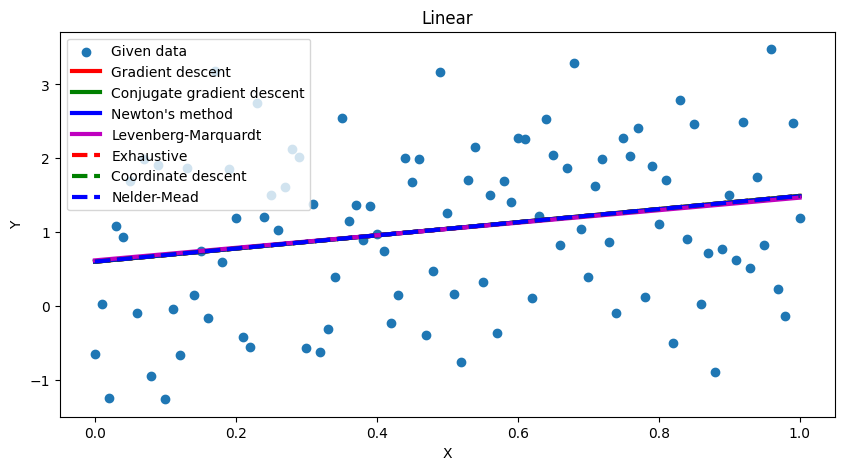

In [57]:
plt.figure(figsize=(10,5))
plt.title("Linear")
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(xk,yk, label = "Given data")

plt.plot(xk, f_linear(xk, grad_linear_res[0], grad_linear_res[1]), 'r', label="Gradient descent", linewidth = 3)
plt.plot(xk, f_linear(xk, sgd_linear_res[0], sgd_linear_res[1]), 'g', label="Conjugate gradient descent", linewidth = 3)
plt.plot(xk, f_linear(xk, newton_linear_res[0], newton_linear_res[1]), 'b', label="Newton's method", linewidth = 3)
plt.plot(xk, f_linear(xk, lm_linear_res[0], lm_linear_res[1]), 'm', label="Levenberg-Marquardt", linewidth = 3)

plt.plot(xk, f_linear(xk, exh_linear_res[0], exh_linear_res[1]), 'r', label="Exhaustive", linewidth = 3, linestyle='dashed')
plt.plot(xk, f_linear(xk, cd_linear_res[0], cd_linear_res[1]), 'g', label="Coordinate descent", linewidth = 3, linestyle='dashed')
plt.plot(xk, f_linear(xk, nm_linear_res[0], nm_linear_res[1]), 'b', label="Nelder-Mead", linewidth = 3, linestyle='dashed')
plt.legend()

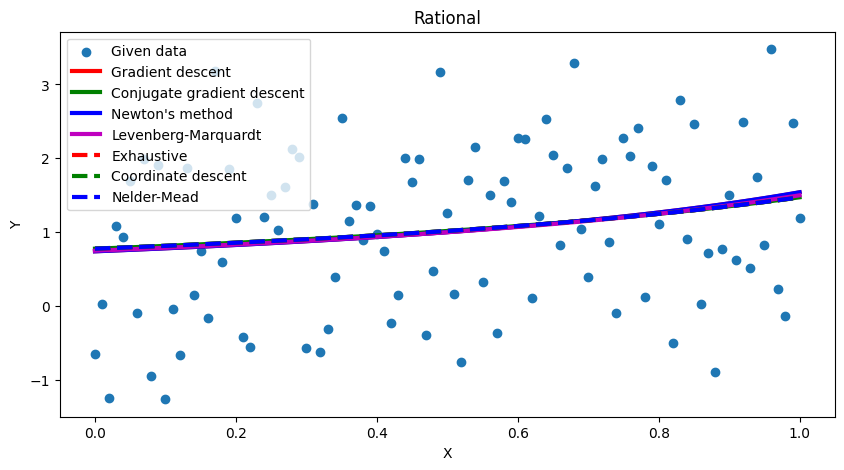

In [58]:
plt.figure(figsize=(10,5))
plt.title("Rational")
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(xk,yk, label = "Given data")

plt.plot(xk, f_ration(xk, grad_ration_res[0], grad_ration_res[1]), 'r', label="Gradient descent", linewidth = 3)
plt.plot(xk, f_ration(xk, sgd_ration_res[0], sgd_ration_res[1]), 'g', label="Conjugate gradient descent", linewidth = 3)
plt.plot(xk, f_ration(xk, newton_ration_res[0], newton_ration_res[1]), 'b', label="Newton's method", linewidth = 3)
plt.plot(xk, f_ration(xk, lm_ration_res[0], lm_ration_res[1]), 'm', label="Levenberg-Marquardt", linewidth = 3)

plt.plot(xk, f_ration(xk, exh_ration_res[0], exh_ration_res[1]), 'r', label="Exhaustive", linewidth = 3, linestyle='dashed')
plt.plot(xk, f_ration(xk, cd_ration_res[0], cd_ration_res[1]), 'g', label="Coordinate descent", linewidth = 3, linestyle='dashed')
plt.plot(xk, f_ration(xk, nm_ration_res[0], nm_ration_res[1]), 'b', label="Nelder-Mead", linewidth = 3, linestyle='dashed')
plt.legend()